# Gradient descent algorithm using Python

Gradient descent is one of the most common optimization algorithms used in machine learning aided Linear Regression. A general equation of a straight line is $y = mx + b$. Let's say a data set has multiple features (i.e. multiple $x$ values), then in order to get a line of best fit, we need to optimize the parameters $m$ and $b$ that will minimize the 'mean square errors'. Mean square error (MSE) is also called 'cost' function (mostly in data science and machine learning).

Mean square errors or the cost function (denoted by C from now on) is defined as:

\begin{equation}
C = \frac{1}{N} \sum_i (y_i - y_{i,predicted})^2 \tag{1}
\end{equation}

where $y_i$ are the real values for your target variable and $y_{i,predicted}$ are the values predicted for the $i^{th}$ target variable by your model, and N is the number x's in your data. Since, $y_{i,predicted} = m_ix + b_i$, we can rewrite the above equation as

\begin{equation}
C = \frac{1}{n} \sum_i (y_i - (m_ix_i + b_i))^2 \tag{2}
\end{equation}

Our goal is to find the parameters $m_i$ and $b_i$ that will minimize the value of C. It is a function of two parameters $m_i$ and $b_i$ in this case, i.e., C = C($m_i$,$b_i$). We take the partial derivative of C with respect to $m_i$ and $b_i$. Let's start by taking the partial derivative of MSE with respect to $m_i$:

\begin{equation}
\frac{\partial C}{\partial m_i} = - x_i \frac{2}{n} (y_i - (m_ix_i + b_i)) \tag{3}
\end{equation}

and when we take the partial derivative of C with respect to $b_i$, we get

\begin{equation}
\frac{\partial C}{\partial b_i} = -\frac{2}{n} (y_i - (m_ix_i + b_i)) \tag{4}
\end{equation}

Now, you should take the following steps in your algorithm:
- Define the cost functions.
- Initialize the calculations by choosing some $m_i$ and $b_i$. 
- Generate $y_{i,predicted}$ using these values and compute cost function. 
- Minimize that cost function with respect to $m_i$ and $b_i$ using the equations (3) and (4). These are your $m_{present\,value}$ and $b_{present\,value}$ in the equations below. 
- Now, you need to update the values of $m_i$ and $b_i$. It is done by choosing proper 'learning rate'.

\begin{equation}
m_{updated} = m_{present\,value} - (learning\,rate) \,m_i \tag{5} \\
b_{updated} = b_{present\,value} - (learning\,rate) \,b_i
\end{equation}

- Compute updated cost function, updated m and b as above.
- It takes multiple iterations to reach the 'global minima' of the function. Try different number of iterations according to your need. 
- Since the goal is to reduce the cost function in order to reach the global minima, your cost function should decrease after each iterations. 

Now, let's code the algorithm.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
def grad_descent(x,y,learning_rate):
    N = len(x)
    n_iterations = 1000
    m_present = 0
    b_present = 0
    for i in range(n_iterations):
        y_predicted = m_present * x + b_present
        C = (1/N)*sum((y-y_predicted)**2) # equation (2)
        m_present = m_present - learning_rate*(-(2/N)*sum(x*(y-y_predicted))) # equation (5)
        b_present = b_present - learning_rate*(-(2/N)*sum(y-y_predicted)) # equation (5)
        print("The cost is {} after {} iteration(s).".format(C, i))

In [90]:
# Example
x = np.linspace(0,10,40)
noise = np.random.default_rng()
y = [((i*2)+noise.random()) for i in x]

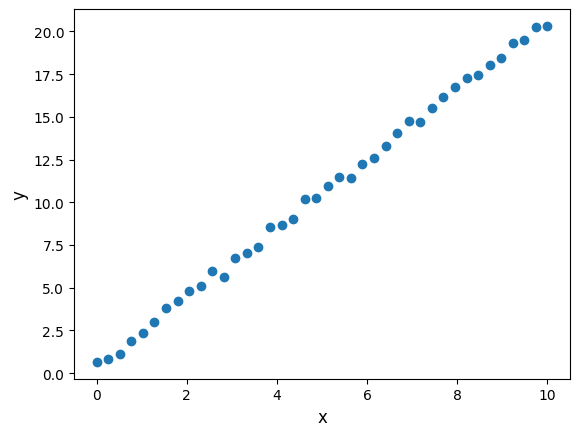

In [91]:
# Let's see how our x and y look like
plt.scatter(x,y)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.show()

In [92]:
# Let's see how the algorithm perfoms
grad_descent(x,y,0.0005)

The cost is 146.98725122541143 after 0 iteration(s).
The cost is 137.02204506453867 after 1 iteration(s).
The cost is 127.7327077611164 after 2 iteration(s).
The cost is 119.07339994106246 after 3 iteration(s).
The cost is 111.00139118878052 after 4 iteration(s).
The cost is 103.47684918863384 after 5 iteration(s).
The cost is 96.46264316745197 after 6 iteration(s).
The cost is 89.92416066813323 after 7 iteration(s).
The cost is 83.82913675018972 after 8 iteration(s).
The cost is 78.14749477440364 after 9 iteration(s).
The cost is 72.85119798592727 after 10 iteration(s).
The cost is 67.91411116344476 after 11 iteration(s).
The cost is 63.311871651686715 after 12 iteration(s).
The cost is 59.021769140891436 after 13 iteration(s).
The cost is 55.02263359996945 after 14 iteration(s).
The cost is 51.29473081036405 after 15 iteration(s).
The cost is 47.81966498510647 after 16 iteration(s).
The cost is 44.58028799252746 after 17 iteration(s).
The cost is 41.560614736678396 after 18 iteration

We can see that with each iteration, the cost is decreasing and saturating towards the end. Choosing proper values of learning_rate and number of iterations play very important roles in gradient descent algorithms.